# 1. Importing Libraries, Dataset

Solution to kaggle

https://www.kaggle.com/brendanartley/mnist-digit-recognizer-keras-cnn-99-6 : 0.99564
https://www.kaggle.com/fuzzywizard/beginners-guide-to-cnn-accuracy-99-7/comments : no score, great explanation
https://www.kaggle.com/samiptimalsena/t-sne-approach-to-mnist : small & sweet code, no markings
https://www.kaggle.com/datajameson/mnist-top-5-using-cnn-accuracy-0-997 : 0.99614
https://www.kaggle.com/craigmthomas/beginner-guide-to-digit-recognition-part-2 : 0.98207

In [1]:
from datetime import datetime as dt
# Get the start time of code execution
st_time = dt.now()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import cv2


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

<b>GC</b> stands for Garbage Collection
<br> <b>CV</b> stands for computer vision

In [3]:
Train=pd.read_csv('train.csv')
Test=pd.read_csv('test.csv')

In [4]:
print("Train Dataset Dimensions: ",Train.shape)
print("Test Dataset Dimensions : ",Test.shape)

Train Dataset Dimensions:  (39008, 785)
Test Dataset Dimensions :  (28000, 784)


Extra column in Training Dataset is of <b>'Label'</b>

In [5]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Data Understanding & Modification

### a) Visualising Label / Number In Image

In [12]:
SecondRowImageinTrain = Train.iloc[1, 1:]
print(type(SecondRowImageinTrain))
print(SecondRowImageinTrain.shape)

<class 'pandas.core.series.Series'>
(784,)


### It is a 28*28 matrix (= 784 columns)

In [13]:
SecondRowImageinTrain=SecondRowImageinTrain.values.reshape(28,28)

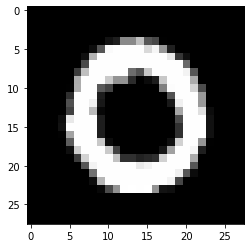

In [14]:
plt.imshow(SecondRowImageinTrain, cmap='gray')

### b) Visualising Label / Number In Array

In [15]:
# Pixel values in the form of array
# 255 - high values indicate white colour
# 0 - low values indicate black colour
print(SecondRowImageinTrain[0:28, 4:18])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  18.  30. 137. 137. 192.  86.  72.   1.]
 [  0.   0.   0.   0.  13.  86. 250. 254. 254. 254. 254. 217. 246. 151.]
 [  0.   0.   0.  16. 179. 254. 254. 254. 254. 254. 254. 254. 254. 254.]
 [  0.   0.   0.  72. 254. 254. 254. 254. 254. 254. 254. 254. 254. 254.]
 [  0.   0.  61. 191. 254. 254. 254. 254. 254. 109.  83. 199. 254. 254.]
 [  0.   0. 172. 254. 254. 254. 202. 147. 147.  45.   0.  11.  29. 200.]
 [  0.   1. 174. 254. 254.  89.  67.   0.   0.   0.   0.   0.   0. 128.]
 [  0.  47. 254. 254. 254.  29.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  80. 254. 254. 240.  24.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  64. 254. 254. 186.   7.   0.   0.   0.   0.

<b> Clearly Half zero can be visualised from above output as well <b>

### c) Verify Count of each Label

In [17]:
Train.label.value_counts()

1    4356
7    4099
3    4051
2    3893
9    3890
6    3820
0    3805
8    3781
4    3759
5    3554
Name: label, dtype: int64

In [18]:
# Total no. of rows
len(Train.index)

39008

C:\Users\Bhanu Wadhwani\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

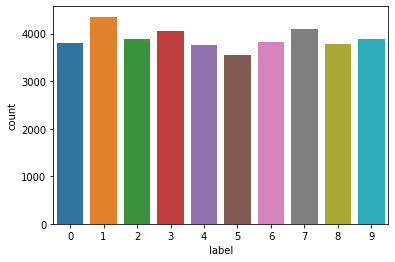

In [19]:
sns.countplot(Train["label"])

In [20]:
a=Train.label.value_counts()/len(Train.index)
b=a*100
c=round(b,2)
c

1    11.17
7    10.51
3    10.39
2     9.98
9     9.97
6     9.79
0     9.75
8     9.69
4     9.64
5     9.11
Name: label, dtype: float64

From above, we can observe that each digit/label has an approximately 9 % to 11 % fraction in the dataset 
<br> Hence the <b>Dataset is Balanced. </b>
<br>
<br> SVMs rarely perform well on imbalanced data.
<br>Since this is a balanced dataset, we can go ahead with SVM

### d) Cleaning / Filling Dataset

In [25]:
# Code to check Unique values in Entire Training Dataset
# checking because Nan values are present & causes error while building model
# nan Values present at bottom
for col in Train:
    print(Train[col].unique())

[1 0 4 7 3 5 8 9 2 6]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[  0 116  10]
[  0 254 216]
[  0 216]
[0 9]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0 8]
[  0  85   2 157 132  67]
[  0 253   3  13  51  82  30  37 197 212 254]
[  0 227 146 252 254  76 111 255 253 170  52  34  93  35  22  25 133]
[  0 132  92  84  25 113 230  13 135  52  49 161  37   4  57 170  62 198
  39 243 226 218  64 133]
[  0 158 253   4  55   3  24 179 224 227 218 254 113 255  28  49 208 120
 163 116  44 145 147  57 133 106]
[  0 255  83 228 195  89 123 253 186  42  77 212 234  60 170   4  46 244
   9 240 169 208 254 110 128 167  21  80  16 183   1 114  70  47 171]
[  0   9  45  90 170 234 254 100 216 131  92 182 184  30  50   6 151   2
 236 183  76 128 212 206 166 220   5  38  75  80  32  36 103 185 253 255
 239 112  10 202 217  91   3  37]
[  0  13  93 254   2 128 116 100 151   9  38  29 219  24  25  91  53 177
  11 255  22 168  60 198 235  92 155 222 104 195 187 145 170  46  64

[  0   5 192  82  14   4  11  32  95  29  26  57  39  52  16 253 176  91
   1 220 214 250 249 217 155 136   8  63  65 245 175 248 117  17 254  13
  86 231 116  80 101  41 181  21  94 247 179 241 201   7 252 125 154   9
 171  79  28 141   2 255 200  27  15   3  22 195 131 208  20   6 191  45
  59  48 127 240  93 112  76  99 227  10 113 106 160 178 150 139  98  37
  51 188 128  62 180 161 222  77  12 100 202 102  56 114  19  96  90  83
 226  23  89  49  60 168 151 216 149  71  64 115 203  69 121 197  25 173
  38  40  46  67  75  31 174  34 157 118  53 159  43  87 158 105 207  85
 119  66  58  18 198  97 225  35 169 123 206 104  88 246 135  50 187 144
  84 109 233  70 133 148 185 140  47 186 194 219 132 251 163 223 172 228
 143  42  92 215 243  30 235 108 142 212 156 138 134 232 209 152  72  78
 244 165 199 124 145 182 193 167 237  44  74 190 147  36 130 110 189 146
 137 239 221 230 234  24 153]
[  0  60  13 123 116  31 104 182  64  33  90  57  24  12  35 233 144 207
  16  11  49 114 227 

  75  43 164  74]
[247 254   0 253 193 174 224 252   7 228 137 242  53  97  84 166 237 147
 255  56  17  47 219 233 155 164  76 229 239 216 215 180  64  21 128 138
  69 195 106 140  77   8 249 152  16  81  86 124 227 198 208  10 243   2
 189 191  75 225 248  91  30 101  42 172 171 169 250   3 207 251 170   5
 201  23 163 173 206  31  29  22   6 222  73 108 244 232  14   9 135 213
  20  90  39  33 142 151  34 103  58  45 187 221  57   1  68  82  41 181
 149  67 114 139  88 231  27 116 153 202 240  74 214 205 168  15  85  49
 210  62 133 160 204 196  37 217  52  19   4 132 186  54  51 157 109 125
 182  38 197  44 167  70 154 158 188 162 178 120 200 129 238  87 118 241
  48  65 102  25 223 209  71 119 148 234  96 176  63  95 203 111 211 107
 183 161 105  28  24 143 110  94  72 150 113 185 141 246  79  40 194 235
  26 218 159 220 192  98 190  12 212 245 230 100  50 179 226 134  43  18
  99 123  59  80 146  60  35 165 126  13 112  55 236  66 130 177  11  32
 127 184  92  61 199  89 122  46 

  82.  89.  77. 201.]
[  0.   5. 119.  77. 253.  62. 230. 254. 213.  23.  18. 146. 101. 206.
   3.  96.  97. 252. 215. 103.  17. 126. 106. 255. 195.  92.  31.  84.
 224. 142.  21. 116.  16. 113. 109.  94. 114. 123.  42. 108. 229. 167.
  56.  10. 223.  61.  69.  20. 134. 246.  13.  83.  19.  99.  95. 201.
 140. 203. 177. 250.  89.  32.  57.  25.   7. 191. 189. 139.   1. 249.
  22. 178.  53.   2. 220.  60. 100.  68.  37.  14.  81. 120.  35. 205.
 241.  86.  41. 217. 102. 137.  46.   6.  51. 244. 237. 115. 210. 174.
 128.  34. 157.  29. 153.  58.  72. 248. 112.  28. 226. 184. 165.  49.
 227.  75. 181.   9.   4. 131.  11. 169.  93. 194. 117. 251. 168.  33.
   8.  24. 136. 149.  64.  27.  66.  38. 186. 208. 232.  39. 233.  71.
 190. 221. 192. 188. 199.  50. 143. 242. 121.  91. 187. 175. 155. 197.
  79.  45. 110. 160.  52. 216. 231.  90. 150. 172. 158. 243.  70. 222.
  76.  78. 127. 104. 247. 239.  59.  55. 107. 179. 111.  67. 135. 145.
 122.  54.  82. 204.  47. 238. 183.  65. 161. 218.  26.

[  0.   3.  15.  14. 253. 210.  18. 254. 250.  31. 252. 135. 146.  57.
 242. 224. 213. 255.  78. 170. 235. 197.  12.  36.  10. 226. 199. 184.
 238.  98.   4. 206. 144. 243. 193. 162.  53. 100. 191. 172.  43.  62.
 221.  96. 112.  65. 113. 233. 201. 119.  17.  13. 182. 134. 107. 249.
  77. 240.  64.  25. 114. 186.  73. 211.  40. 177.  47.  81. 160.  29.
 137.   5.  21. 203.  42. 251.  30. 124. 101.  19. 228.  52. 215. 145.
  35. 126. 151. 131.  87. 127. 128.  58.  72. 232. 106. 231. 142.  74.
 241. 244.  97. 239. 133. 246.   1. 227. 157.   2. 236. 155. 245.   8.
 190. 181. 167. 247.  80.  75.  38.  82.  51.  39. 204.  88. 200.  95.
 196. 207. 234.  41.   6. 194. 141.  48. 212. 216.  66. 169. 222.   9.
 120. 220. 105. 188. 195. 223. 116.  34.  85. 148. 175. 102.  37.   7.
  28. 214. 154.  71. 158. 123.  46.  24. 248. 132. 104. 147. 174.  23.
  92.  60.  11.  94. 129. 237. 118. 205. 130. 198.  54. 121. 115.  50.
 165.  86. 149.  63.  20.  70. 179. 225.  61.  93. 185. 209.  45. 219.
 153. 

[  0.  13.  42.  80.   5. 233.  31. 139. 191.  91. 135. 177.  64. 153.
 100.  78. 236. 126. 155. 229.  60.  24.  21.   4.   2.  83. 182.  23.
  19. 251.  96.  74. 235.  61.   6. 106. 198.  55.  56.  59.  34.  50.
  17. 248.  11.  36. 128.  48. 253. 199. 103. 110. 109.  28.  51. 164.
 202. 212.  41.  45. 240. 245. 225.  38.  65. 108. 187. 252. 104. 111.
 112.  20.  25.   1.  47. 174.  32.   3.  18.  94. 123. 116. 175. 144.
 220. 161.  86.  77.  15.  10.  87. 213.  81.  90. 127. 183.  70.  54.
  40. 255.  63. 147. 226.  39. 207.  12. 115.  35.  84. 125. 141.  99.
  95.  82.  14.  57. 105.  58.  73.]
[  0.  27.  22.  60. 222.  18.  82.   9.  45.  13.   2. 137.  51.  10.
 118. 252.   1. 243. 192. 173.  73.  86. 178.  57.  11.]
[  0.  27.  67.  96. 110.]
[ 0. 32.]
[  0.  32. 103.  76.  15.  63.  25. 253.]
[  0.  12. 120.  31.  15. 255.  64.  48.   3. 201.  57.  60. 253.   6.
  11. 230. 104.   7.  53.   9. 143. 169.  74.  49.  23. 213. 235.  94.
   4. 161. 125.   5. 121. 252. 254. 175.  83. 

[254.   0. 215. 200. 103. 252. 255. 221. 253. 226.   2. 223. 188.  18.
  45. 208. 203. 176.  91. 155.  85. 173.  64. 196.  14. 198. 227.   4.
  83. 115. 171. 250. 247. 228.  92.  42.  29.  19.  93.  28. 181. 166.
 137. 214. 178.  98. 229.  95.   6.  23. 211.  73. 106. 249.  58.  62.
 131. 218. 232. 240. 172. 206.  97. 189.  82.  94.  32. 111. 177. 130.
 159.  65. 199. 241.  13. 251. 128. 142. 105. 237.  57. 234. 209.  25.
 205. 230. 148. 236.  30. 220. 164. 153. 191.  35. 116. 108. 233.  27.
 244. 139. 245.  80.  48.   9.  78. 243.  39. 144.  47. 248. 238. 225.
 167. 186. 197.  46. 207.  63.  15. 231. 216. 136. 168. 192. 145. 146.
  24. 235. 102. 150. 242. 163. 202. 126. 161.   5. 180.  84. 219.  38.
 195. 190. 162. 169. 151.  11.  49.  12.  21.  22.  50.  60. 175.  87.
 158. 143. 107. 239. 179.  77. 184.  59. 121.  41. 204.   8.   7. 217.
 183.  99. 147.  72. 120.  88.  17. 127.  52. 210. 117. 129. 185. 113.
 134.  76.  70.  54. 112. 224.  10. 140. 123.  89.  86. 119.  31.  56.
 110. 

[  0.   2. 253.   7.  47. 254.  19. 128.  64.  35. 251.  18.   4. 187.
 195.  88.  63.  10. 244.  11. 169.  98. 237. 191. 105. 138.  99. 125.
  31. 221.  13. 171.  45. 139.   5. 216. 131. 145. 189. 168.  73.  96.
  32. 252. 255.  49.  77.  51.  23.  65. 156. 113. 203. 213.  28. 123.
 106. 198.  15. 186.  41.  44.  60. 140.  71. 141. 222. 116.  52. 183.
 137.  29. 182.  91. 110.  66.  93.  59.   3.  43.  85. 100.   1.  48.
  38.  16. 228. 114. 149. 248.  25.  20. 176. 172.  46. 174. 242. 165.
   9. 245.  50. 226. 118. 115. 196. 227. 212.  34. 220.  17. 177. 225.
 173.  39. 208. 135. 249.  97. 109.  78. 170. 224.  26. 144. 184. 247.
  21. 219. 154. 160.   6.  89. 151. 193.  87. 236.   8.  70.  92. 102.
 200. 119.  81.  67.  62.  86.  36. 197. 163.  37. 108. 214. 194. 155.
 246. 178.  42. 111. 143. 112.  69.  72.  12. 127. 232. 201. 122. 240.
 147. 166.  53.  84. 231. 202.  57. 103. 192. 217.  94. 250. 175.  22.
 104.  27.  61.  83.  56. 238. 230. 107. 243. 121. 120.  68. 209.  24.
 132. 

[  0. 184.  72. 254.  12. 253. 245.   3.  68.   6. 240.  17.   2. 161.
  64. 192. 252.  54.  16.  91. 170. 126. 226. 231. 111. 232. 255. 128.
  84.  37.  24. 169. 122. 125. 138.   4. 190. 218.  28.  25.  21.  57.
 239. 210.  40. 228. 213.  10. 191.  95. 246. 202.  87. 198. 200. 139.
 102. 108. 203. 146. 233. 243. 212. 167.  70. 165.   7. 230.  36. 227.
 205. 251.  82. 207.  96. 107.  98.  78.  46. 237.  42. 150. 194.  77.
  35. 141.  80. 208. 186. 174. 160.  23.  30.  44. 145.  53. 225.  45.
  39.   5. 217. 242. 223. 112.  47. 164. 140. 155. 183.  90.   9.  55.
 250. 178.  13. 113.  63. 132.  15. 216. 168. 120. 234. 147. 159.  92.
  99.  97.  71. 222.  34. 209. 115. 219.  27. 221. 238.  49. 180. 179.
 131.  60. 156. 134.  19.  88. 117. 229. 103.  32. 157. 137. 235.  85.
 214.  48. 241. 206.  11. 133. 173. 182.  31.  89. 109.   1.  14. 143.
 176. 105. 244.  43. 215. 201. 171. 211.  73. 153. 236. 204. 166. 247.
 177.  66.  79.  65.  33. 154.  86.  67. 188. 195.  50. 181.  76. 189.
 119. 

[  0.  96.  24.   7.  85. 152. 254.   9. 156. 255.  55. 128.   4. 197.
 210.  18.  13.   5. 191.  79.  98.  35.  41.  97. 253. 233.  27. 148.
 223.  63. 105.  68. 244. 168. 113. 161. 123. 114. 141.  83. 205.  57.
  93. 237.  31.  76. 138.  73.  86.  36.  92.  42.  74. 232. 242. 136.
 252.  56.   3.  47. 109. 212.  48.  26. 195.  34.  20. 216. 112. 239.
 214.  29. 247. 241.  32.  94. 144. 170.  58.  16. 140.   8. 251. 245.
 137. 221. 202.  39. 181.  75. 201. 189. 165. 172.  10. 106.  91. 238.
 171.  37. 121. 133.  12. 117. 243. 174. 159. 158. 183.  50. 231.  60.
 167. 226. 169. 179. 101.  43. 145.  33.   6. 119.  22.   1.  28. 200.
  17. 154.  67. 118.  64. 192. 250. 188. 193. 103. 208. 215. 149. 111.
 131.  15. 102. 196. 132.  87.  59. 173.  49.  23.  25. 155. 139. 227.
 116. 126.  80.   2. 246.  77. 125. 217.  45. 186.  66. 129.  21. 153.
  69. 178.  11. 120. 127. 157.  99. 176.  51. 230. 124. 229. 135. 163.
  53.  61. 184. 249. 142.  52. 134. 236.  70. 180. 146.  14.  46. 198.
 203. 

 117.  92.  46.  71.]
[  0. 254.  18. 253.   6. 255. 168. 252.  69.   9.  24.  72. 206. 152.
 139. 151.  61.  19.   4. 251. 148. 114. 203. 142.  73.  15. 191.  77.
 150. 239.  64. 237. 124. 247. 248. 179. 235. 202. 229.  94. 230. 231.
  35.  12. 228. 220.  39.   1.  90. 240. 169.  65. 194. 200.  41.  17.
 223. 106.  70.  40.  96. 236. 163.  29. 219.  42.  43. 249.  20. 218.
 222. 199. 130.  51. 193.  55. 189. 122.  37. 170.  88.  95.  86. 145.
 244. 188. 198.  81. 113.  23.  99. 128.  75. 183.  49.  68.  44.  28.
  91. 107. 243.  11. 110. 246. 250.   7.  14. 108. 100.  56. 131.   8.
  89. 241. 204.   5.  82. 213. 224. 212. 173. 233.  83.  38. 154. 172.
 117.  32. 175.  93.  87.   3. 208.  13. 115.  10.  16. 221. 242.  30.
 205. 146.  57.  31. 156.  46. 186.  33.  25. 196. 167. 176. 118. 127.
  26. 155. 101. 195.  36. 112. 129. 234. 227. 232. 120. 215. 182. 140.
  54. 105. 192. 132. 185.  60. 102. 201.  34.  79. 225.  74. 123. 159.
 211. 103. 217. 161.  78.  76.  63.  27. 209. 177.  53.

[ 89.   0.  91. 129. 223. 252. 253. 207. 155.  13. 236. 227.  82.  39.
  83. 251. 184. 254.  37. 245. 255. 150.   7.  56. 213. 224.  60. 119.
 116. 100. 128. 211.   3. 166. 226.  12. 173.  11.  52.  49.   1.   8.
 196. 159.  66. 115.  61.   9.  50. 194. 168. 247. 248. 217.  20. 111.
 117.  90. 143. 197. 191.  43.  23.  54.  25. 107.  87. 149.  73. 215.
 141.  29. 134.  10.  31. 113.  48.  63.  22.  78. 225.  71. 210.  64.
 157. 102.  28.  16. 138. 199.  46.  84.  81. 206.  30. 192.  88.  33.
 229.  55. 189. 101. 240.  45.  35. 202. 181.  96. 216. 195.  74.  53.
  72. 142.   5. 156.  24. 242.  26. 233.  17.  94. 124. 136.  14. 127.
 103. 172.  32. 249. 122. 165.  38. 137.   2. 222. 167.  85. 151.  57.
  77.  41. 153.  51. 164.  79. 177. 228. 193.  98.   6. 235. 231. 140.
  93. 135. 237. 201. 241.  68. 109. 120. 205. 190.  99. 244. 169. 203.
 188. 239.   4. 220. 218. 131.  58. 147. 182. 221. 246. 161. 160. 180.
 146.  44. 232. 132.  75. 230. 212.  67. 198.  95.  36. 250.  70.  19.
 123. 

[  0.   1.  28.  78.  34.   3. 211. 191.   9. 147.  97.  47. 253.  13.
 255. 143.  24. 114. 252.   2. 173. 104. 154. 232. 169. 207.  30.  64.
 224. 141. 190.  38.  15.  17.  37.  19.  33.  27.  73. 138. 188. 179.
 165.  93.  22. 250. 226. 139.  59. 196. 110.  20.  25.  44. 134. 170.
 116. 206.   6.  98.  74. 189.  29. 109. 233. 100. 223.  14.  62. 214.
  18. 254.  96.   5. 192.  10. 175. 221.  99.   8.  54. 148. 135.   7.
  16.  92. 195.  45. 107.  95. 128.  49. 111.  75. 119.  69.  84. 215.
  66.  31. 158.   4. 133. 225.  26.  57. 129. 187. 238. 144.  11. 132.
 235. 127. 241.  81.  42.  35. 145.  23. 108.  41. 137. 155. 125. 151.
 180.  65. 131.  63. 152. 176. 157. 168.  67. 242. 199.  32. 181.  51.
 117. 230.  46. 200.  58. 246. 210. 149. 248. 251.  71. 102. 122. 244.
 106. 146. 227.  21.  68. 153. 213.  77.  39. 121. 126. 112.  61.  89.
  94. 198.  50.  56. 167. 193. 240. 103. 203. 172. 162. 182.  53.  55.
  88.  70. 201. 222.  40.  36. 184. 236. 120.  48.  83. 123.  60. 212.
 142. 

[  0.   6. 201. 252. 193. 229. 239. 134.  17. 178. 194. 191. 253.   3.
 157. 254.  23.  97. 243. 149.  65. 123.   4. 146. 171. 210.  70. 136.
 147.  92.  64.  16. 236.   5.  98. 214. 150. 139. 222.  83.  93. 235.
 128.   7. 246.  26. 172.  50. 110.  95. 164. 212. 255.  11. 111. 154.
 225. 209.  41. 221.  47.  86. 174. 160.  54. 113.  75. 244. 151.  99.
  91.  78. 168. 215.  22. 204. 145. 122.  20.  72. 251. 170.  10.  84.
  58. 183.  40. 242. 165.  32. 102.  30.  19. 227.  37.  38. 234.  56.
 249. 173.  74. 240. 233.  55. 117.  29.  44.  62. 200. 208. 140. 116.
 108.  59. 230.  79.   8. 152. 213.  13.  31. 119. 138.   2.  88. 188.
 232.  12. 179.  90. 126. 114.  36. 175. 217. 196. 132.  66. 220. 120.
  48. 199. 190.  46. 129. 162.  71.  63.  80. 166.  14. 187. 184.  39.
 186. 159. 106. 241.  15. 144. 112. 131. 238. 103. 198. 216. 228. 245.
  27.  28.  60. 141. 224.  49.  42.  89. 203. 211.  51. 195. 192. 158.
  87. 148. 250.  18. 247.  77.   1.  33.   9.  82.  85. 189. 182.  21.
 218. 

In [26]:
# Code to check Unique values in Entire Testing Dataset
for col in Test:
    print(Test[col].unique())

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[ 0 38]
[  0 114 236]
[  0 163 158 102  47]
[  0 233  13 254 249 139]
[  0  55 128 106 144  26  13  31 179 253 235 254]
[  0 163  34 254 237  52 255  22 210 192  21  44 231  10  82   5  49  32
 145]
[  0  41 203 113 253  32 220  43  29  22 193 108 128  89 162 215 212  34
 247 110  35 214 243  59  20 191  28 185 199  79 240  93 168 225]
[  0 217 168  26 137 178  25 229   2 216 249  86  69 253 204 220  57 255
 151   7 150 209  50  20 134  91 243 203  76   5  41 104 210 254 103 214
  39   3]
[  0 174 254   5 253  84   4  13 123 100 255 139   6 104 186   9 148  19
 103  31   3 211  18  29 143 206 232 128  26 235 163  25 157  83 159  72]
[  0  19 177 114 253 179  64 254 191 236  56  52 149 102  93 154 231 110
  51 193 140 221 230 151 255 116 144 121 157 167 232 216  62  21  42   7]
[  0 176 193 147  11 253 255   9  62  29 107 250 122 254   6 169 184 192
  19  9

[253   0 212  84 245  23 255  15  25 204 252 251 218 197 254  70  22  46
  38  29 243 133 121 221 235 100 152 200 109 185 178  80 244 111 131 129
   6  82  12   7 236   4 225 128 176 216 159  39 246 238 248  19 180  96
 113 224 194 210 209 175   5 145 162 250 231  27 239  66  42 203  56  32
  63 226 219 241 141  68 249 130 138 189 184  41 196 153  28  11 201  95
 181 101 240  74  26 198  35 167 127 247 207 174 217 215 211 102  72 233
  87  24  17 137 125  30 166 163  92 190 142 120  85  21 222 151 140   2
 114  37 206 119 144  64  36 104   3 230 108 227 122 134 234  54 191  13
  86 229 170  18  50 237  61 208 110 164 205 123  60   1 161 149  10  65
  52 228 160  58  51  73  34  47  20 220 124  31 171  81 136 115  14  43
  71 195 116 156 146  93 214 169 182  62 223 213 168 148 242 193 139  59
  48 106  90  94 177 187  67 132 172 103 202 155 183  91  88  33 126 158
   9 150 105 157  45  69 112 199  53 192 135 188 154 107 186 179 147 118
   8  77  16 232  83  76  55 173  78  40  75 117  4

[  0 250 183 100 252 244 255 211 168  21 197 253  13 128  85 242 251  30
 210  86  22  54   2  40  59 116  20   7  64 130  97  96  24 254   4 233
 140  11  80 198 194 114 215 165 119  81  36  92 109  47 164 213 188  87
  50 120 159 104  27 175 219  93 143 226 189 238 153  61 212  17  53  88
  38  35 167  62 131   5  31 187  12   1  10 236  55  65  37 248 209 243
  71 220 241   9 125 111 169 179  46  83 155 152 249 207  45   8  77  68
  16 240 229 192 126  79 127 185 145  76 222  94 170  66 149  67 102  95
 150  19  14  48  43  15 108 115 141  49  18 129 232   3  26 121 235 184
 118 162 148 154  89  82 200 124  73 217 146 224 139   6 161  41 216 176
  63  25  51 228 147 239 123 237 246 172  99 208 223 174 230  57 158 157
 202 142 234 156 203  69  29  32  84  72 151 205 193 191  78  23 105 190
 201 137  98 177  39 173 195 221 225 136 206 132 113 180 144  70 122 133
 134 106 110 231 218  74  33 245 107  44 214  58 135 181 182 103  34  56
  90 171 247 227 196 166  75 204 160 199  28 112 11

[  0 137  14 233  35 113  21 255 252 251  47  20 253 245 254  38  76 197
 195  22 130   7  93 175 135 116  23  97 157 227  28 250  27  24 248 136
  31  16 198  70  99 114   8 238 129  56  84 231  57  59 140  29  49  90
 207  98 203 112   5  11 216 211 226 235 173 184 143 249  92  71  44  67
 101  30 242  10  19 201 244 171 145  53   6 185 210 166 191 169 215  50
 174 126 100 236   4 187 156  55 194 200 138 241 128  36 158 109 202 118
 133 144 134  17 228 168 160  87 106 111 161 183 163 151 125 105  63  69
 150 104 178  72  74 165 196  34 190  26  82 193  95  54 229 239 123  39
 146  79  65  61 192  45 247 127  64  68 237   2 119 217  88  96  62  18
   1  73 234  42 154 152 172 162  75 155 177 222  32 199 232  80  86   9
 221 159  40 214   3  52 103 225  15  66 121 132 180  77 186 223 170 131
 153 120  81  25 124  91 206 182 142 181  60 204 220  46  13  37 110  48
 115 243 167 224 209 246 139 189 107  89 147  94 188 164  78  51 240  43
  41 141 102 230 176 218 208 219 213 108 149 179 11

[222   0  12  19  64 253 252  24 248  21   8 191 228 128  78 254 224 145
 246 137 202 185  56 207 229 127 242 255   7  91  38  68 235 238 123  82
 187 245 236  20 239 195  34 218 232 251 117  62   9  84  85 250 147 169
 190 159 173 234 243  57 113  61  29 100 160 216 168 166 209 212  97  27
 130 215  41 204  58  13 101  18 151  25 197 240  51   2 225 200  23  52
  95  88  54  37  63 214  28  42   5 213 153  98  69  15 206 150 170 178
  26 142 161 182  96 133  33 152 136 192  59 174 217 201  83 184  40 171
 121   3 193 125  31 131 208  77   6  92  73 211 144 138 119 135  32  14
 156   1  90 132 233   4 115  44 205 163  16  11 154 172  75 247  10 198
 148  70 203 221  72 231 141  45 230 237 179 241 180 111 146 162 143 188
 167  99 177  89 226  53 109  17 210 165  76 175  94  74 124 199  67 157
  49  71 110 223  35  30  86 227 196 194 105 126  66 220 219 249 139  48
  39 183 129 103 108 189 112  79 114  81  50 107  47  93  43  36 140 106
  87  60 176 122  80 181  22 102  55 244 149  65 16

[ 10 250   5   0 253 152 251 254 186  55 255 252  65 123 170  23 185   2
  51 209 189 246 188 216 198 233  49 126 156  39 202 141  18  16  14 214
  60 228 232 138 101  86  34  84 218  44  96 181   3 200  20 217  76 173
  98  61 207 236 102 183 128 135 196 245 104  64 125  66 163 197 221 195
 133 151 237 142 105 169 160 243 144  47  68  74 184 177 211 146 132 147
  93 155  89 187  53 247 203 241 215  72  43 205  40 231 240 168 193   8
 210 154 191  71 242 175 238  31 239 230 118  13 164 194  11 179 134  63
 157 115  25  73 106 208   1 229  17  27  85 172 162 122 120 248 212  58
 127 180 107  21 150 244   4 201 206 111  70  29  57 227 220 112 136 204
   9 226  54 145  62  42   6 235  75 192 199 161  45 234  33  24  95 158
 103 222 129 110  32 137  78 178  26  48 108 249  83 224 148 119 116  38
  56 153  97  94  80 143 223   7 213 140 174  52  12  59  92 139  15 171
 166  22  30 124  36 149  37  41  28  87  50 159  81 225 130 131 109  99
  82  79  19  46  88 114  90 165 167  77  35 100 18

[  0 213 255 253 173 192  23 252  40 118 170  69 196  29 191   1 230 194
  14 254  61   4 223 224 220 186 122  65 163  25 202 128  34 102  26 145
  24  11 124 219  66  76  17  80  20  86   5 149 106 227 169 113 112  93
 214 218 201  87 206 120  33 119 241 236 147 105  15  91 107  16 225  28
 135 126 204  70  31  38  19 144 137 111 246 108  84 239  22 131  62 165
 251  10 143 233 237 157 238  58 130 215 148 129 195 176   6 232  13  96
 134 244  42 138 189 200  94  78  90 133  75   3 250   9 160  77 166  79
  41 217 100   7  95 168 158 207 198  85 103  43 125 159  60 172  52  50
  35 116 231  98 146 212  57   8  92  21 226 188   2 114 178 199  36  47
  64 228 156  71 193  99  55 161 203 184 151  30 245 154 140  49 240 109
 167 177  89  46  53  27 162  18  44 248  51  72 197 182 187 175 190 150
 123 136  48  56 104 101 117  59 242 210 249 216 174  73 208  97 142 139
 153 115 164 179 222  74 234  32 235 127  68  67 205  39 121 211 209 110
 221  12 152 171  45  82  63 229  88 155  37 132  8

In [27]:
# Finding null values in every column of dataframe 
Train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [31]:
# NA is missing number & NAN has the result & is 'Not a Number'
# Replacing it with 0, so that error doesn't come while predicting X_test
Train=Train.fillna(0)
Train=Train.replace(np.nan, 0)

In [32]:
# Check whether NA & NAN have been replaced by 0 properly
Train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [33]:
# Finding null values in every column of dataframe 
Test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [34]:
# Although null values are not present, we will run function for safety
Test=Test.fillna(0)
Test=Test.replace(np.nan, 0)

In [35]:
Train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,39008.000000,39008.0,39008.0,39008.0,39008.0,39008.0,39008.0,39008.0,39008.0,39008.0,...,39008.000000,39008.000000,39008.000000,39008.000000,39008.000000,39008.000000,39008.0,39008.0,39008.0,39008.0
mean,4.459906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224031,0.110259,0.056629,0.021303,0.018560,0.003076,0.0,0.0,0.0,0.0
std,2.886169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.376452,4.417779,3.252501,1.824084,1.965807,0.429858,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Majority of the pixel values have minimum value of 0
<br> Also we do have have maximum pixel value of 255

<br> For better convergence of Gradient Descent, we need to rescale the features.

### e) Feature Scaling

In [36]:
# We cannot apply scaler on first column of Label
# Hence before applying scaler function, we will store it separately
X=Train.iloc[:,1:]
Y=Train.iloc[:,0]

In [37]:
# Normalisation
X=X/255.0
Test=Test/255.0

In [38]:
Scaler=StandardScaler()

In [39]:
X=Scaler.fit_transform(X)
Test=Scaler.fit_transform(Test)

In [40]:
# train test split with train_size=10% and test size=90%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.30, random_state=101)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11702, 784)
(27306, 784)
(11702,)
(27306,)


# 3) Model Building

Building the model and tuning the hyperparameters.

### a) Linear SVM

Let's first building a linear SVM model (i.e. a linear kernel).

In [42]:
svm_linear=svm.SVC(kernel='linear')

In [43]:
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [44]:
# predict
Y_pred = svm_linear.predict(X_test)
Y_pred

array([4, 3, 6, ..., 7, 1, 6], dtype=int64)

In [50]:
# topmost row - actual values
# leftmost column - predicted values
#    1  0
# 1 TP FP 
# 0 FN TN
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i but predicted to be in class j
confusion = metrics.confusion_matrix(Y_test, Y_pred)
confusion

array([[2565,    1,   14,    3,    6,   21,   17,    2,   10,    3],
       [   1, 3003,   14,    8,    5,    2,    1,    6,   16,    1],
       [  30,   35, 2487,   67,   47,   15,   11,   41,   37,    3],
       [   6,   22,   85, 2471,    9,  120,    4,   14,   47,   17],
       [   7,    5,   30,    3, 2461,    4,   19,   20,    2,   96],
       [  27,    9,   18,  110,   23, 2173,   34,    3,   52,   15],
       [  30,    6,   50,    4,   39,   38, 2509,    0,    8,    0],
       [   3,   20,   27,   28,   44,    6,    1, 2620,    3,  105],
       [  14,   40,   39,   94,   18,  123,   14,   15, 2284,   29],
       [  14,   15,   19,   21,  130,   16,    2,  137,   27, 2336]],
      dtype=int64)

In [46]:
# measure accuracy
metrics.accuracy_score(Y_test, Y_pred)

0.9122170951439245

In [49]:
# class-wise accuracy
class_wise = metrics.classification_report(Y_test, Y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2642
           1       0.95      0.98      0.97      3057
           2       0.89      0.90      0.90      2773
           3       0.88      0.88      0.88      2795
           4       0.88      0.93      0.91      2647
           5       0.86      0.88      0.87      2464
           6       0.96      0.93      0.95      2684
           7       0.92      0.92      0.92      2857
           8       0.92      0.86      0.89      2670
           9       0.90      0.86      0.88      2717

    accuracy                           0.91     27306
   macro avg       0.91      0.91      0.91     27306
weighted avg       0.91      0.91      0.91     27306



In [51]:
# Run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,it'll throw a memory error while training
gc.collect()

40

### b) Non-Linear SVM


Let's now try a non-linear model with the RBF kernel.

In [52]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)

SVC()

In [53]:
# predict
Y_pred_rbf = svm_rbf.predict(X_test)

# accuracy 
print(metrics.accuracy_score(Y_test, Y_pred_rbf))

0.9444444444444444


The accuracy achieved with a non-linear kernel(93.75) is slightly higher than a linear one(90.97).
<br>Let us now do a grid search CV to tune the hyperparameters C and gamma.

### c) Grid Search Cross-Validation

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = { 
                'C'     : [1, 10, 100],
                'gamma' : [1e-2, 1e-3, 1e-4]
             }

In [56]:
svm_grid_search=svm.SVC(kernel="rbf")

clf = GridSearchCV (svm_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True)

clf.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='accuracy')

In [57]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9540.241096,18875.003599,22.595018,0.943204,1,0.01,"{'C': 1, 'gamma': 0.01}",0.768475,0.768475,0.770940,...,0.767390,0.008744,9,0.999680,0.999893,0.999786,0.999786,0.999786,0.999786,0.000068
1,20.358236,0.448656,11.487375,0.137320,1,0.001,"{'C': 1, 'gamma': 0.001}",0.933789,0.941905,0.932906,...,0.936250,0.006250,3,0.971477,0.972973,0.974044,0.973083,0.972869,0.972889,0.000821
2,28.284598,0.116947,15.491303,0.041884,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.903460,0.909013,0.907692,...,0.907965,0.004246,6,0.919880,0.919667,0.920637,0.918821,0.919889,0.919779,0.000581
3,95.650595,10.158882,21.487468,1.128668,10,0.01,"{'C': 10, 'gamma': 0.01}",0.784707,0.785989,0.792308,...,0.784310,0.009103,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,21.877105,0.856890,11.885287,0.389780,10,0.001,"{'C': 10, 'gamma': 0.001}",0.942760,0.947886,0.942308,...,0.944454,0.006908,1,0.999039,0.998932,0.998932,0.998611,0.999145,0.998932,0.000179
5,15.063712,0.368526,10.385213,0.386882,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926527,0.935498,0.926068,...,0.928815,0.006063,4,0.958445,0.957697,0.959838,0.956954,0.958983,0.958383,0.000999
6,135.583152,35.102001,30.693110,8.500830,100,0.01,"{'C': 100, 'gamma': 0.01}",0.784707,0.785989,0.792308,...,0.784310,0.009103,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,30.546709,2.223868,17.354990,0.969318,100,0.001,"{'C': 100, 'gamma': 0.001}",0.940624,0.949167,0.941026,...,0.944027,0.007801,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,17.593528,0.135119,12.816099,0.128813,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930372,0.921828,0.931197,...,0.928645,0.008068,5,0.991988,0.992095,0.993164,0.991455,0.992630,0.992266,0.000584


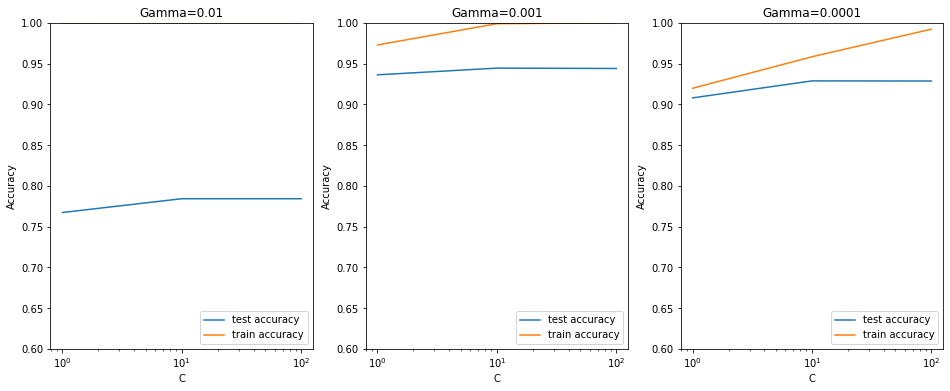

In [58]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

Thus, it seems that the best combination is gamma=0.001 and C=1 (the plot in the middle), which gives the highest test accuracy (~92%) while avoiding overfitting.

Let's now build the final model and see the performance on test data.

Final Model
Let's now build the final model with chosen hyperparameters.

In [43]:
# optimal hyperparameters
best_C = 10
best_gamma = 0.0001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
# predict
Y_pred_Fine_tune_HyperParmeters = svm_final.predict(X_test)

In [45]:
# evaluation: CM 
confusion = metrics.confusion_matrix(Y_test, Y_pred_Fine_tune_HyperParmeters)

# measure accuracy
test_accuracy = metrics.accuracy_score(Y_test,Y_pred_Fine_tune_HyperParmeters)

print(test_accuracy, "\n")
print(confusion)

0.9353621914597524 

[[2595    0    5    4    5   14    7    3    9    0]
 [   0 2992   18   10    6    5    1    6   15    4]
 [  17   21 2577   27   34    6   10   30   46    5]
 [   5    8   61 2545    5   75    5   27   46   18]
 [   6    3   21    1 2486    4   18    7    2   99]
 [  13   14   10   83   20 2239   41    8   30    6]
 [  25    5   30    0    9   38 2562    5   10    0]
 [   3   23   23   13   27    6    0 2681    4   77]
 [   9   36   19   60   17   83   17   11 2394   24]
 [  16   11    7   32   81    5    0   73   22 2470]]


In [46]:
FinalLabels=svm_rbf.predict(Test)

In [47]:
print(FinalLabels)

[2 0 9 ... 3 9 2]


In [48]:
print(np.unique(FinalLabels))

[0 1 2 3 4 5 6 7 8 9]


In [49]:
image_id_test = []

for i in range (len(FinalLabels)):
    image_id_test.append(i+1)
    
d = {'ImageId':image_id_test,'Label':FinalLabels}
answer = pd.DataFrame(d)

answer.to_csv('answer.csv',index=False)

In [50]:
# Get the end time of the code execution
ed_time = dt.now()
# Print the code execution duration
print('Duration: {}'.format(ed_time - st_time))

Duration: 2:32:09.936972
